In [115]:
import numpy as np 
import pandas as pd 
import os
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
dir = 'input/train_merge.csv'
df = pd.read_csv(dir)
df.loc[df.dod.isnull(),'deceased']=0
df.loc[df.dod.notnull(), 'deceased']=1

/tmp/ipykernel_9729/763750042.py:2: DtypeWarning: Columns (54,55,56) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dir)


In [117]:
df

,Unnamed: 0,beneid,claimid,claimstartdt,claimenddt,provider,inscclaimamtreimbursed,attendingphysician,operatingphysician,otherphysician,...,opannualdeductibleamt,inpt,admissiondt,dischargedt,diagnosisgroupcode,ageatclaim,duration,los,dead,deceased
0,0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,...,50,0,NaN,NaN,NaN,73.0,1,NaN,0.0,0.0
1,1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,...,40,0,NaN,NaN,NaN,72.0,1,NaN,0.0,0.0
2,2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,...,40,0,NaN,NaN,NaN,72.0,1,NaN,0.0,0.0
3,3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,...,760,0,NaN,NaN,NaN,86.0,1,NaN,0.0,0.0
4,4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,...,760,0,NaN,NaN,NaN,86.0,1,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,558206,BENE159167,CLM69886,2009-09-28,2009-10-02,PRV53671,7000,PHY345332,PHY319565,NaN,...,280,1,2009-09-28,2009-10-02,812,52.0,5,5.0,0.0,0.0
558207,558207,BENE159175,CLM74504,2009-11-03,2009-11-06,PRV54981,4000,PHY342806,PHY365497,NaN,...,0,1,2009-11-03,2009-11-06,228,56.0,4,4.0,0.0,0.0
558208,558208,BENE159177,CLM76485,2009-11-18,2009-11-22,PRV56588,3000,PHY423220,PHY332752,NaN,...,400,1,2009-11-18,2009-11-22,302,90.0,5,5.0,0.0,0.0
558209,558209,BENE159177,CLM79949,2009-12-17,2009-12-18,PRV56575,5000,PHY353156,NaN,NaN,...,400,1,2009-12-17,2009-12-18,309,90.0,2,2.0,0.0,0.0


In [203]:
binary_data = df[['potentialfraud','gender','race', 'renaldiseaseindicator',\
     'chroniccond_alzheimer','chroniccond_heartfailure', 'chroniccond_kidneydisease',\
     'chroniccond_cancer', 'chroniccond_obstrpulmonary','chroniccond_depression', \
     'chroniccond_diabetes','chroniccond_ischemicheart', 'chroniccond_osteoporasis',\
     'chroniccond_rheumatoidarthritis', 'chroniccond_stroke','inpt','deceased']]

<AxesSubplot:title={'center':'State or Territory vs Count of Claims'}, xlabel='State or Territory', ylabel='Count'>

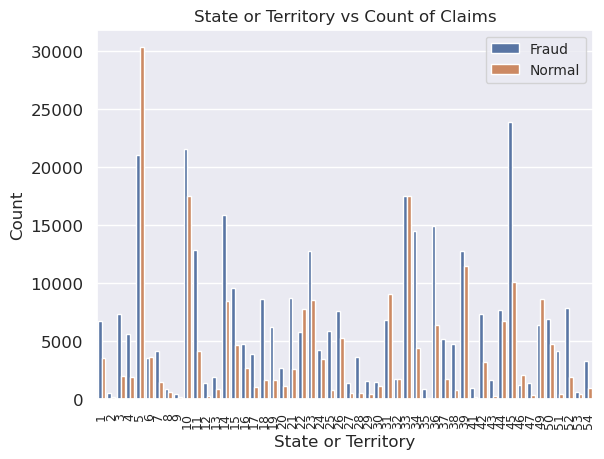

In [230]:
p = sns.countplot(x='state', data=df,hue='potentialfraud')
plt.xticks(rotation=90,fontsize=9)
plt.xlabel("State or Territory",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.yticks(fontsize=12)
plt.title("State or Territory vs Count of Claims", fontsize = 12)
plt.legend(["Fraud", "Normal"], loc="upper right", fontsize = 10)
p

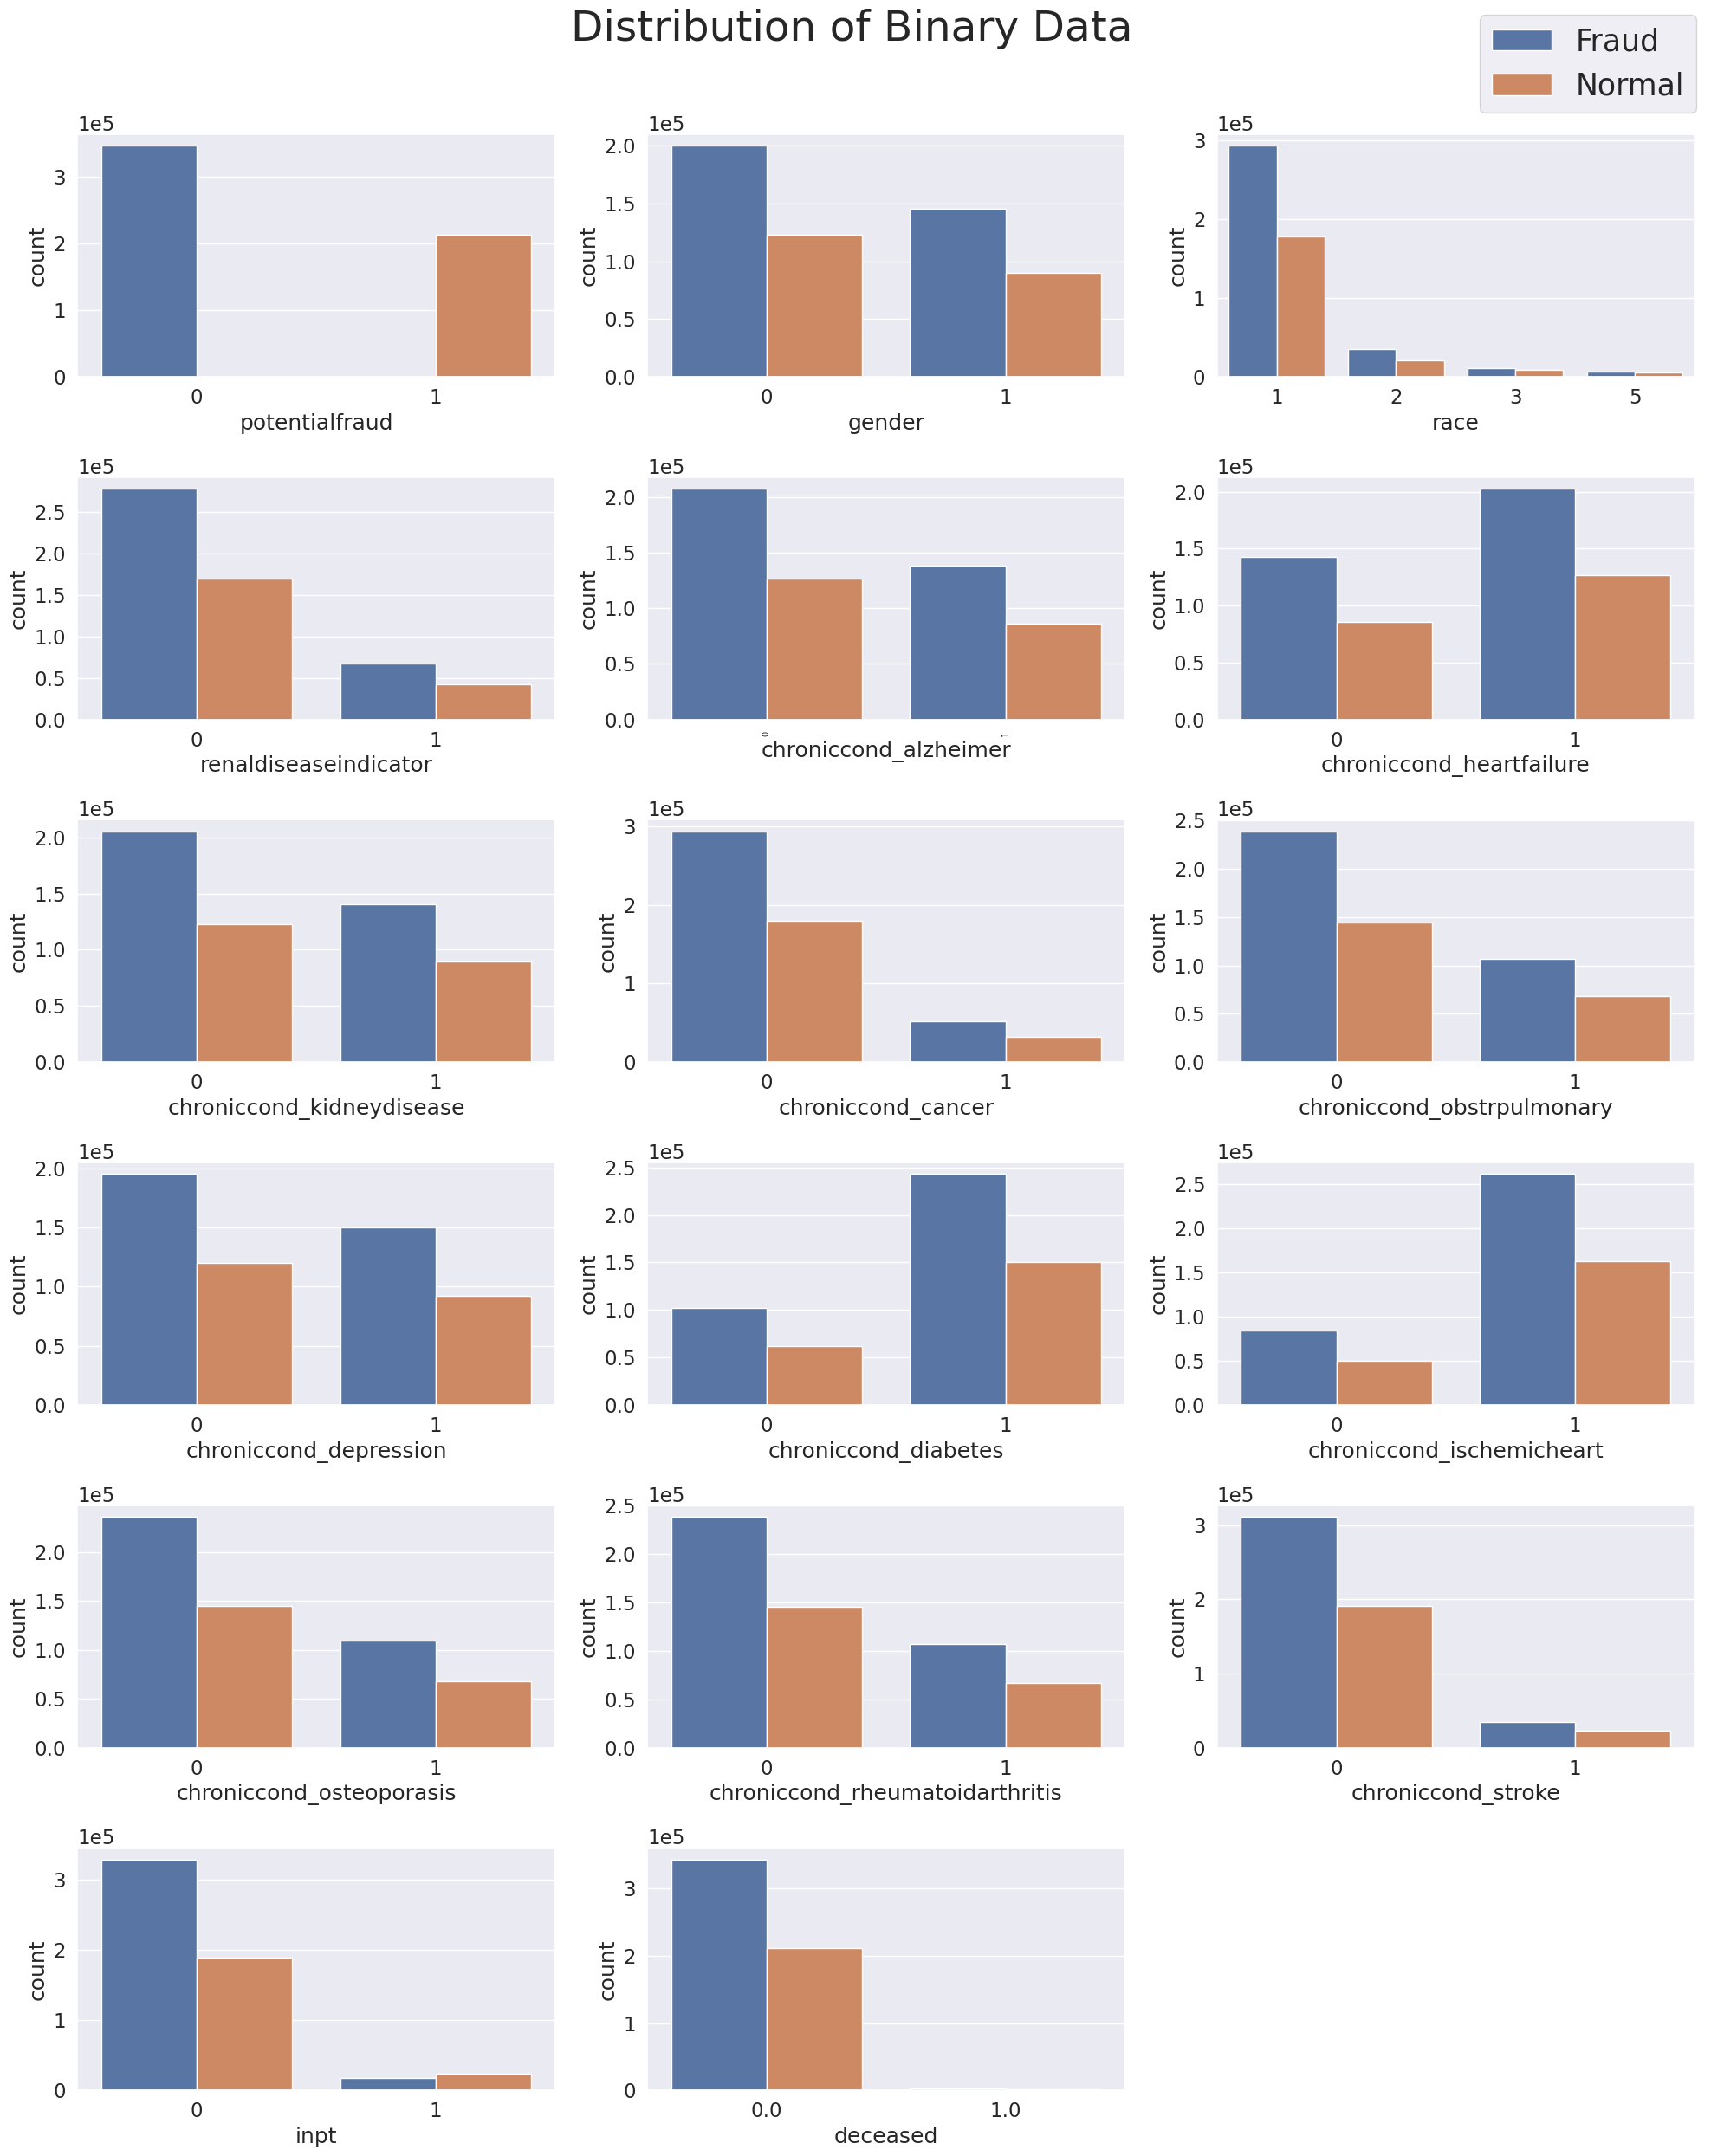

In [204]:
n_cols = 3
features = binary_data.columns.tolist()
n_rows = (len(features) + n_cols - 1) // n_cols
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 4 * n_rows))
axes = axes.flatten()
sns.set(font_scale=1.5)
for i, feature in enumerate(features):
    sns.countplot(x=feature, data=binary_data, ax=axes[i],hue='potentialfraud')
    axes[i].legend([],[], frameon=False) #Remove Legend
    axes[i].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.sca(axes[4])  # set the current axes to subplot at index 4
plt.xticks(rotation=90,fontsize=7)  # rotate the x tick labels of the State by 90 degrees
plt.xticks()

# Remove any extra subplots
for j in range(len(features), n_rows * n_cols):
    fig.delaxes(axes[j])

fig.legend(["Fraud", "Normal"], loc="upper right", fontsize = 25)
fig.tight_layout()
# Show the plot
title = fig.suptitle("Distribution of Binary Data", fontsize=35)
title.set_position([.5, 1.04])
plt.show()

In [120]:
categorical_data=df[['potentialfraud','clmadmitdiagnosiscode','diagnosisgroupcode',
       'clmdiagnosiscode_1', 'clmdiagnosiscode_2', 'clmdiagnosiscode_3',
       'clmdiagnosiscode_4', 'clmdiagnosiscode_5', 'clmdiagnosiscode_6',
       'clmdiagnosiscode_7', 'clmdiagnosiscode_8', 'clmdiagnosiscode_9',
       'clmdiagnosiscode_10', 'clmprocedurecode_1', 'clmprocedurecode_2',
       'clmprocedurecode_3', 'clmprocedurecode_4', 'clmprocedurecode_5','county']]

In [121]:
fraud = df[df['potentialfraud'] == 1]
item_counts = fraud['attendingphysician'].value_counts()
sum(item_counts)
print("Number of Physicians: ",df['attendingphysician'].count())
print("Number of Physicians with Fraud: ",fraud['attendingphysician'].count())

Number of Physicians:  556703
Number of Physicians with Fraud:  212232


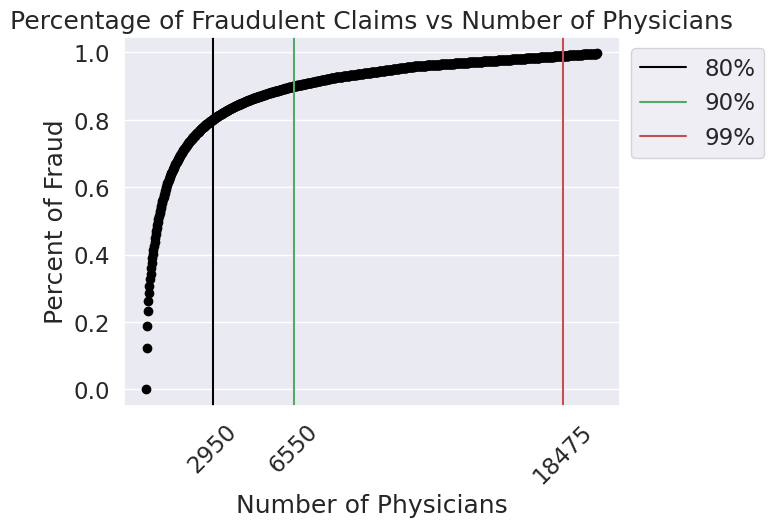

In [122]:
c = 0
step = 25
total = sum(item_counts)
eighty = ninety = ninety_nine = 0
for i in range(0,20000,step):
    c += sum(item_counts[i-step:i])
    y = c/total
    if y > 0.8 and eighty == 0:
        eighty = i
    if y > 0.9 and ninety == 0:
        ninety = i
    if y > 0.99 and ninety_nine == 0:
        ninety_nine = i
    plt.scatter(i,y, c='Black')
plt.axvline(x=eighty,label="80%",color='Black')
plt.axvline(x=ninety,label="90%",color='g')
plt.axvline(x=ninety_nine,label="99%",color='r')
plt.xticks([eighty,ninety,ninety_nine])
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')
plt.title("Percentage of Fraudulent Claims vs Number of Physicians")
plt.xlabel("Number of Physicians")
plt.ylabel("Percent of Fraud")
plt.show()


In [123]:
percent = eighty/df['attendingphysician'].count()*100
print(round(percent, 3), "% of physicians commit 80% of fraud")

0.53 % of physicians commit 80% of fraud


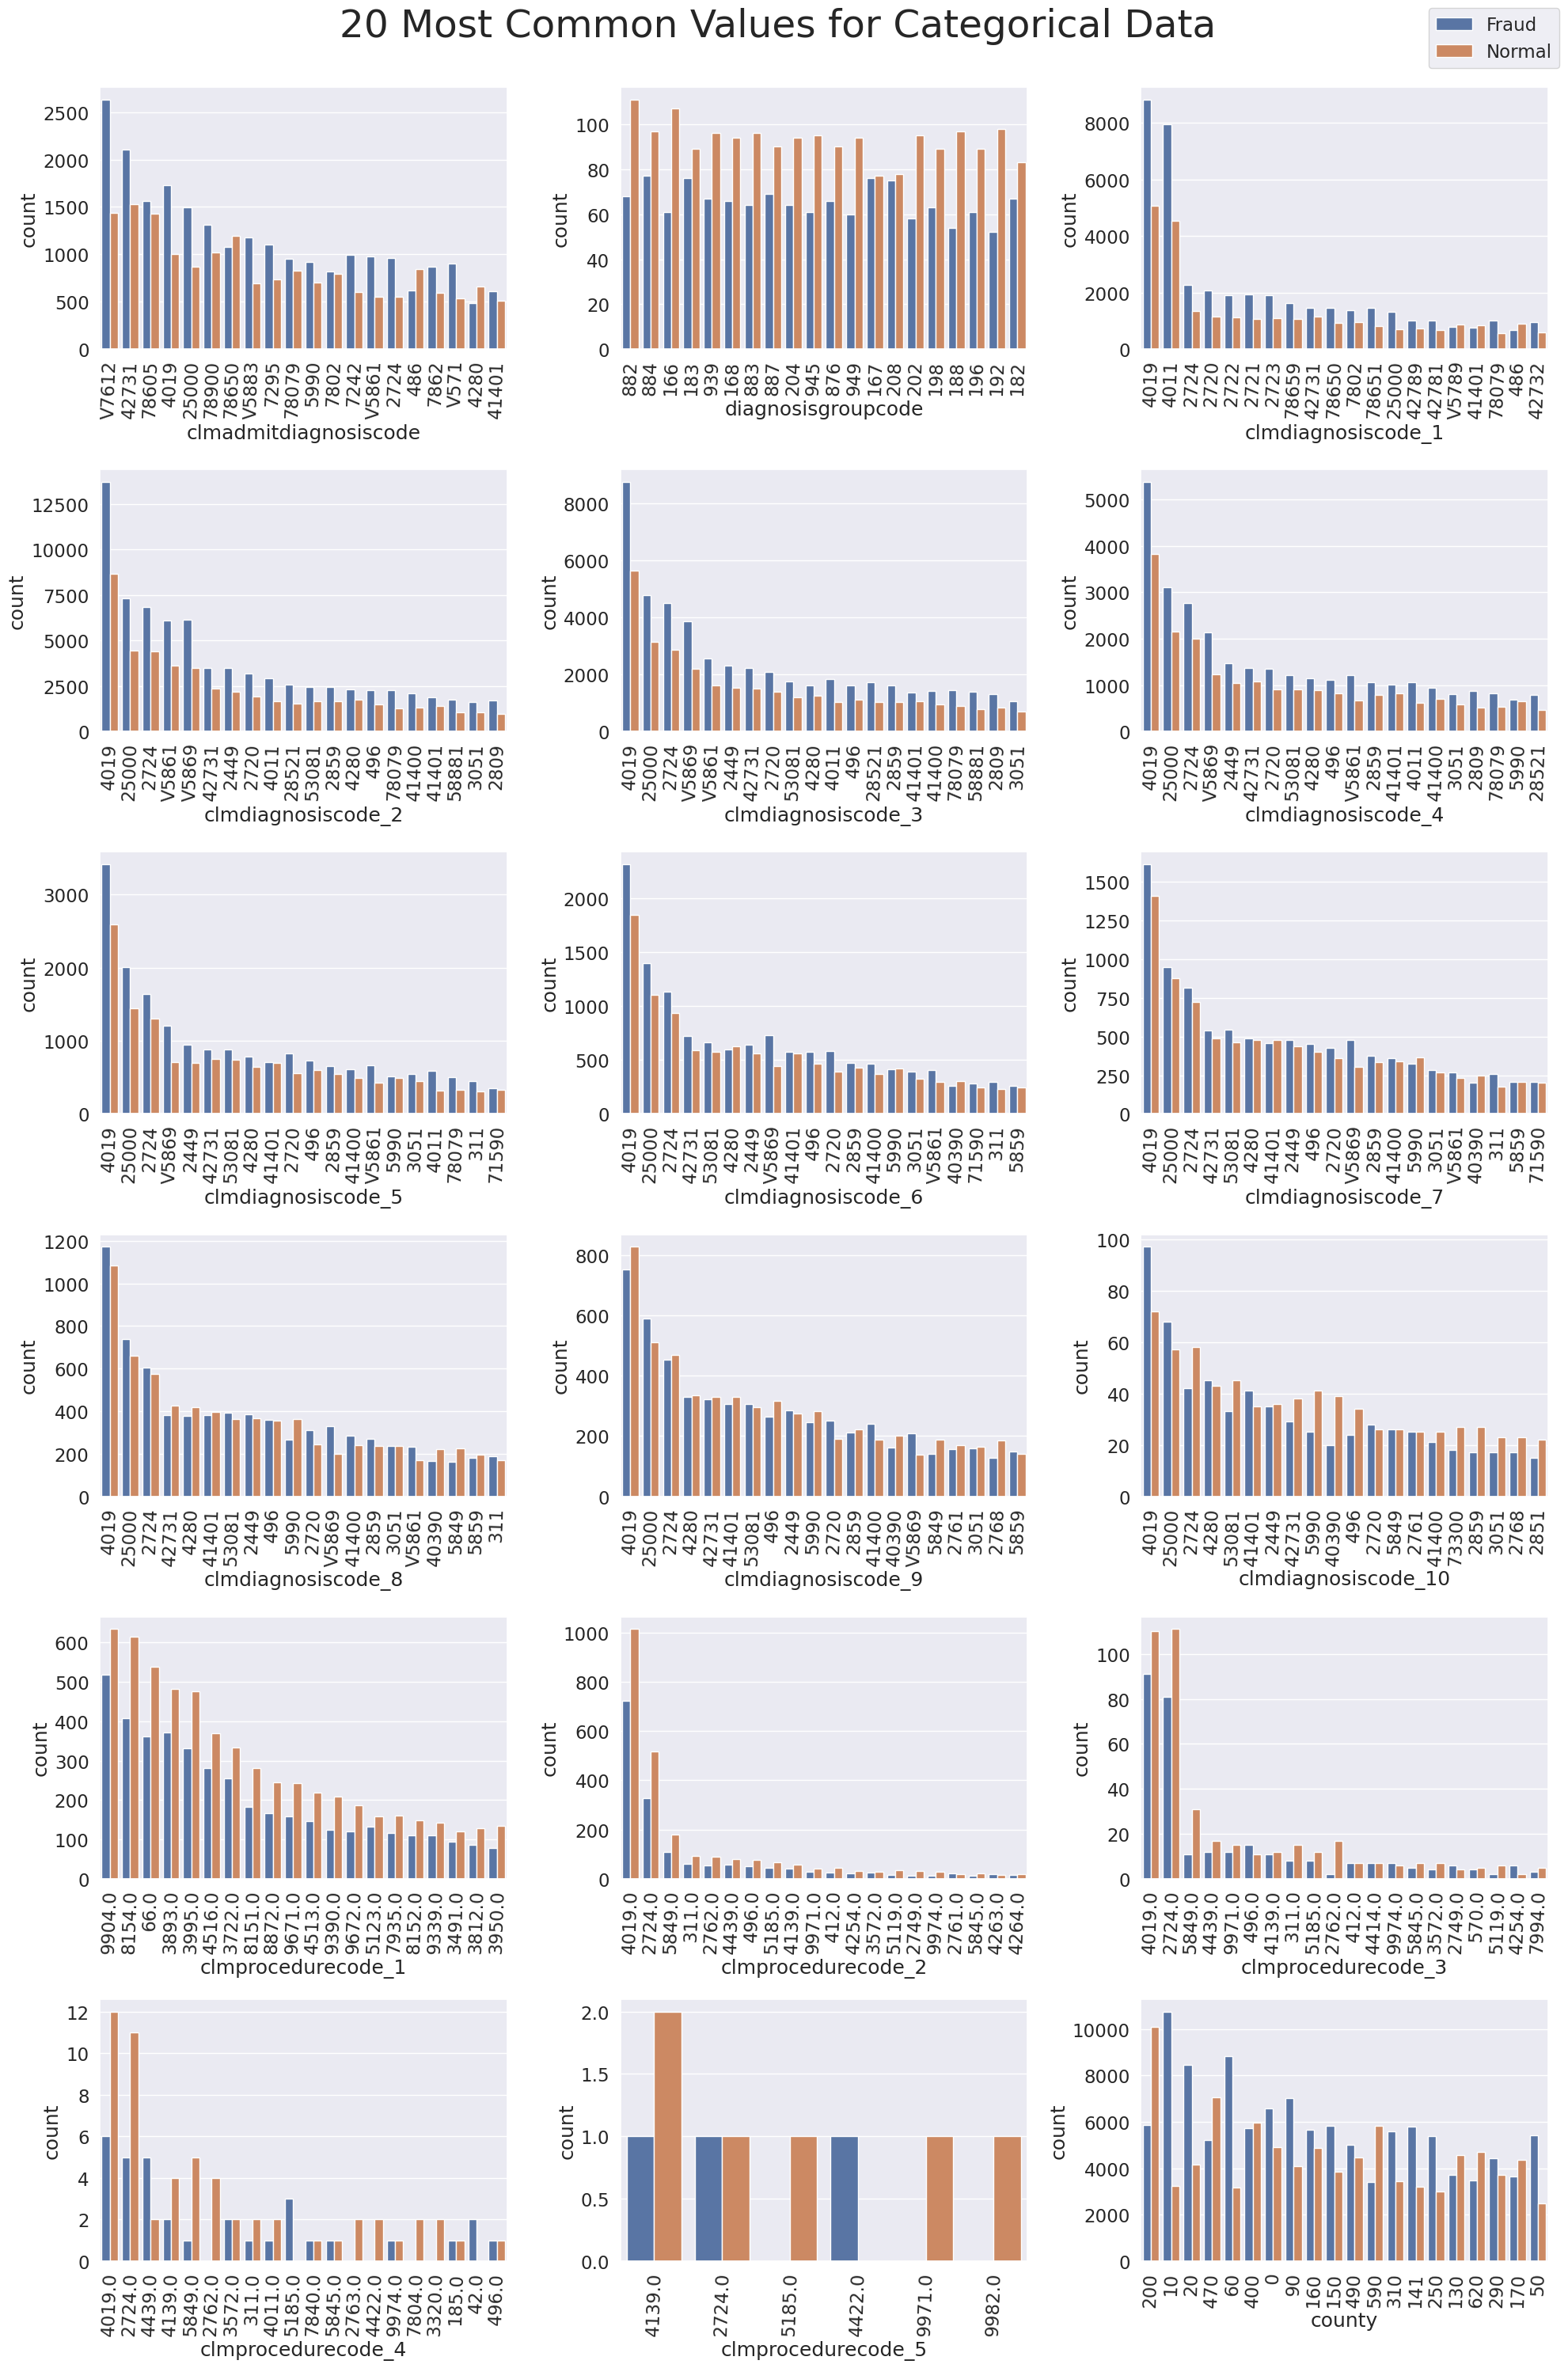

In [124]:
n_cols = 3
features = categorical_data.columns.tolist()[1:]
n_rows = (len(features) + n_cols - 1) // n_cols
# Create the figure and subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 5 * n_rows))
# Loop through the subplots and plot each countplot in the appropriate subplot
for i, feature in enumerate(features):
    row_idx = i // n_cols
    col_idx = i % n_cols
    ax = axes[row_idx, col_idx]
    sns.countplot(x=feature, hue='potentialfraud', data=categorical_data,
                  order=categorical_data[feature].value_counts().iloc[:20].index, ax=ax)
    ax.set_xlabel(feature)
    ax.tick_params(axis='x', labelrotation=88)
    ax.legend([],[], frameon=False)

# Remove any unused subplots
for i in range(len(features), n_rows * n_cols):
    row_idx = i // n_cols
    col_idx = i % n_cols
    fig.delaxes(axes[row_idx, col_idx])

# Adjust spacing between subplots
title = fig.suptitle("20 Most Common Values for Categorical Data", fontsize = 35)
title.set_position([.5, 1.0])
fig.tight_layout()
fig.legend(["Fraud", "Normal"], loc="upper right")
fig.tight_layout()
# Show the plot
plt.show()

In [125]:
### The quantitative features
q = ['inscclaimamtreimbursed','deductibleamtpaid','noofmonths_partacov',
       'noofmonths_partbcov','ipannualreimbursementamt', 'ipannualdeductibleamt',
       'opannualreimbursementamt', 'opannualdeductibleamt','ageatclaim','los','duration']
quant=df.loc[:,q]

In [126]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
scaled = pd.DataFrame(min_max_scaler.fit_transform(quant), columns=q)


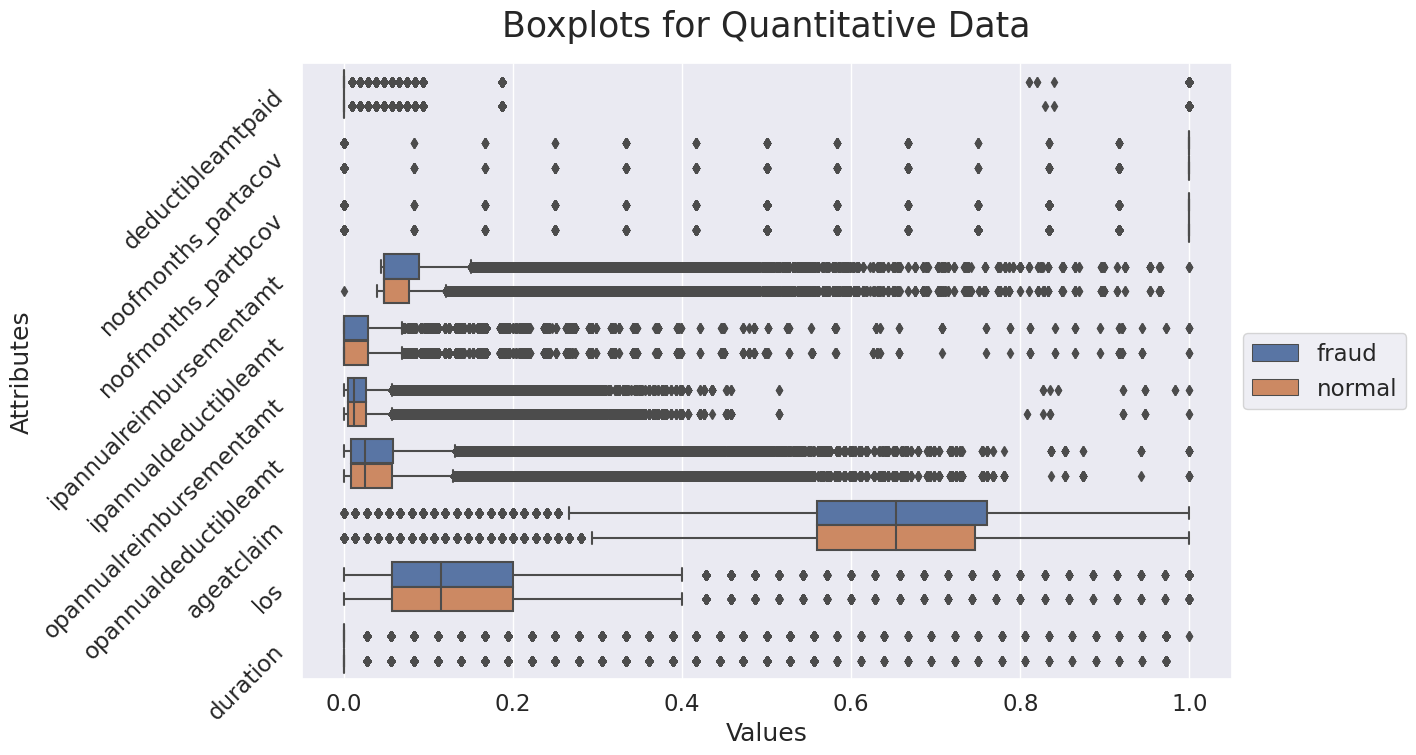

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path


scaled['Class'] = df['potentialfraud'].replace({1: 'fraud', 0: 'normal'})
# melt the dataframe
scaled_melted = scaled.iloc[:, 1:].melt(id_vars='Class', var_name='Attributes', value_name='Values')

# plot the data
plt.figure(figsize=(12, 8))
g = sns.boxplot(x='Values', y='Attributes', hue='Class', data=scaled_melted)
for item in g.get_yticklabels():
    item.set_rotation(45)
plt.title("Boxplots for Quantitative Data", fontsize = 25, y = 1.03)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

<AxesSubplot:title={'center':'Heatmap of Quantitative Data'}>

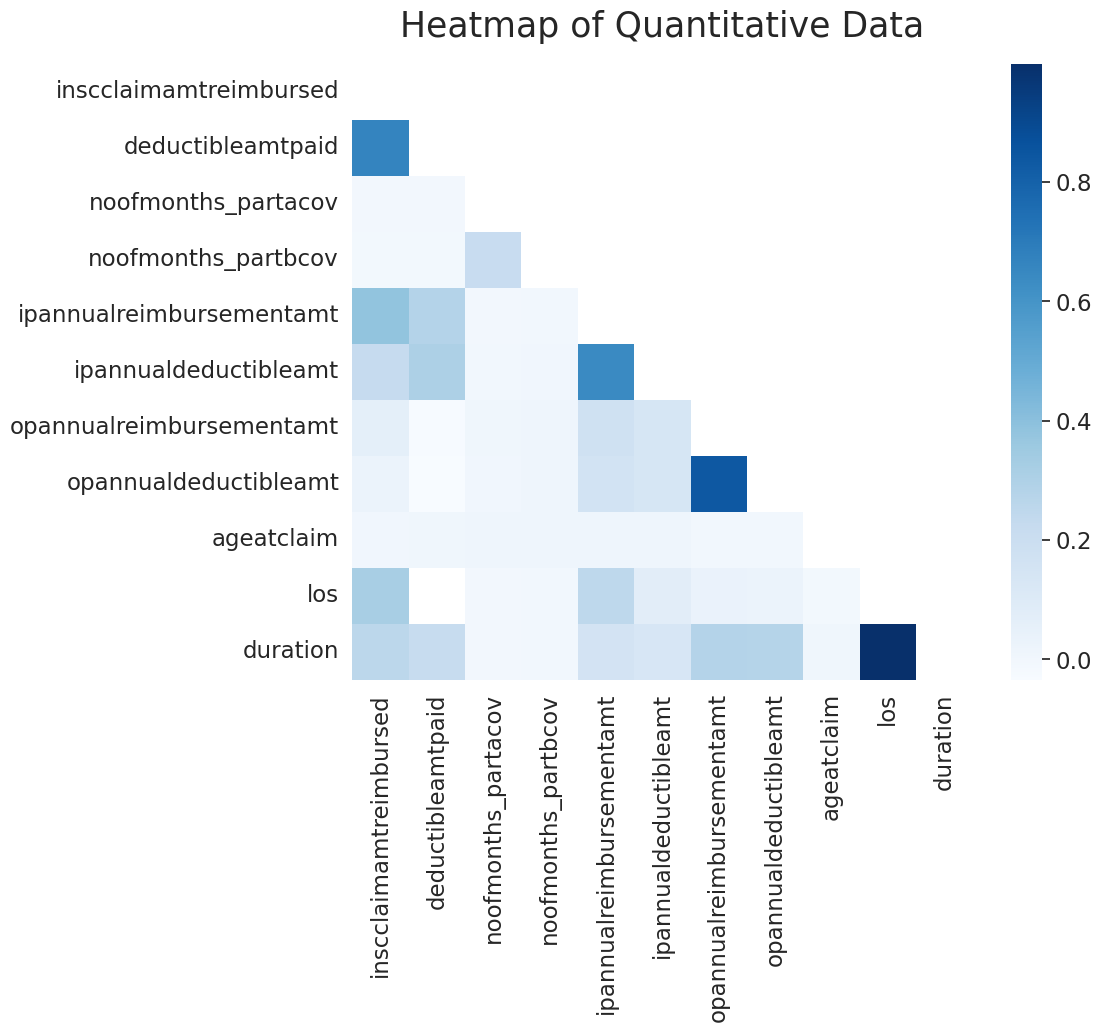

In [128]:
corr = quant.corr()
matrix = np.triu(corr)
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_title("Heatmap of Quantitative Data", fontsize = 25, y = 1.03)
p = sns.heatmap(corr, mask=matrix, cmap='Blues', ax = ax)
p.set_facecolor('white')
p

### PCA of Quantitative Data and Binary Data


In [129]:
data = df[['potentialfraud','gender','race', 'renaldiseaseindicator', 'state',\
     'chroniccond_alzheimer','chroniccond_heartfailure', 'chroniccond_kidneydisease',\
     'chroniccond_cancer', 'chroniccond_obstrpulmonary','chroniccond_depression', \
     'chroniccond_diabetes','chroniccond_ischemicheart', 'chroniccond_osteoporasis',\
     'chroniccond_rheumatoidarthritis', 'chroniccond_stroke','inpt','deceased','inscclaimamtreimbursed','deductibleamtpaid','noofmonths_partacov',
       'noofmonths_partbcov','ipannualreimbursementamt', 'ipannualdeductibleamt',
       'opannualreimbursementamt', 'opannualdeductibleamt','ageatclaim','los','duration']]

In [134]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
scaled = pd.DataFrame(scaler.transform(data))
scaled.fillna(0,inplace=True)

In [140]:
pc3 = PCA(n_components = 3)
pc3.fit(scaled)

PCA(n_components=3)

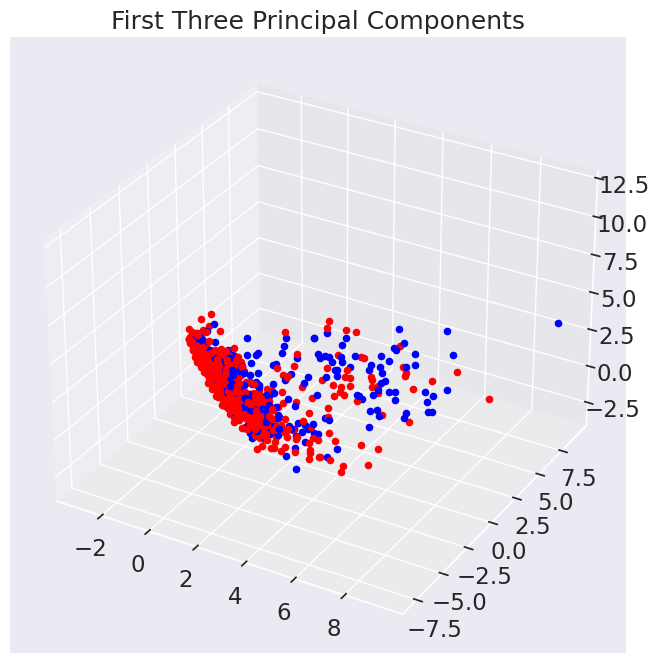

In [174]:
X_pca = pc3.transform(scaled)
fig = plt.figure(figsize=(8, 8))
# plot the principal components in 3 space
plot3d = fig.add_subplot(111, projection='3d')
plt.title("First Three Principal Components")
colors = ['red','blue']
for j in range(0,X_pca.shape[0],500):
  x,y,z = X_pca[j,0], X_pca[j,1],X_pca[j,2]
  plot3d.scatter(x,y,z, color = colors[int(df.potentialfraud[j])])


<Figure size 1200x1200 with 0 Axes>

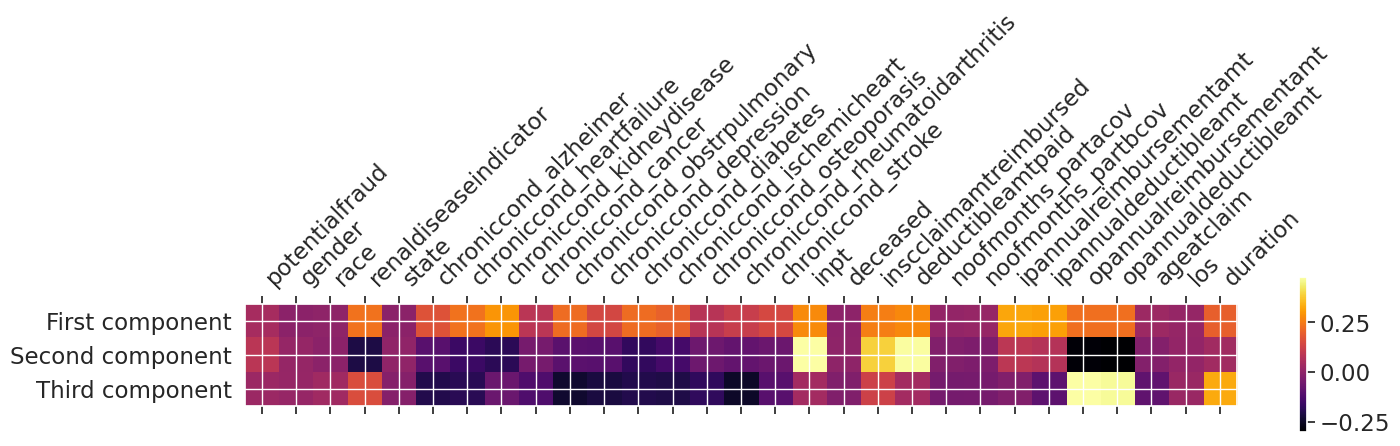

<Figure size 1200x1200 with 0 Axes>

In [200]:
#Plot a colorbar of the first three principal components
plt.matshow(pc3.components_, cmap='inferno')
plt.yticks([0, 1, 2], ["First component", "Second component", "Third component"])
plt.colorbar(orientation='vertical')
plt.xticks(range(scaled.shape[1]),
data.columns, rotation = 45, ha='left')
plt.figure(figsize=(12,12))



<AxesSubplot:>

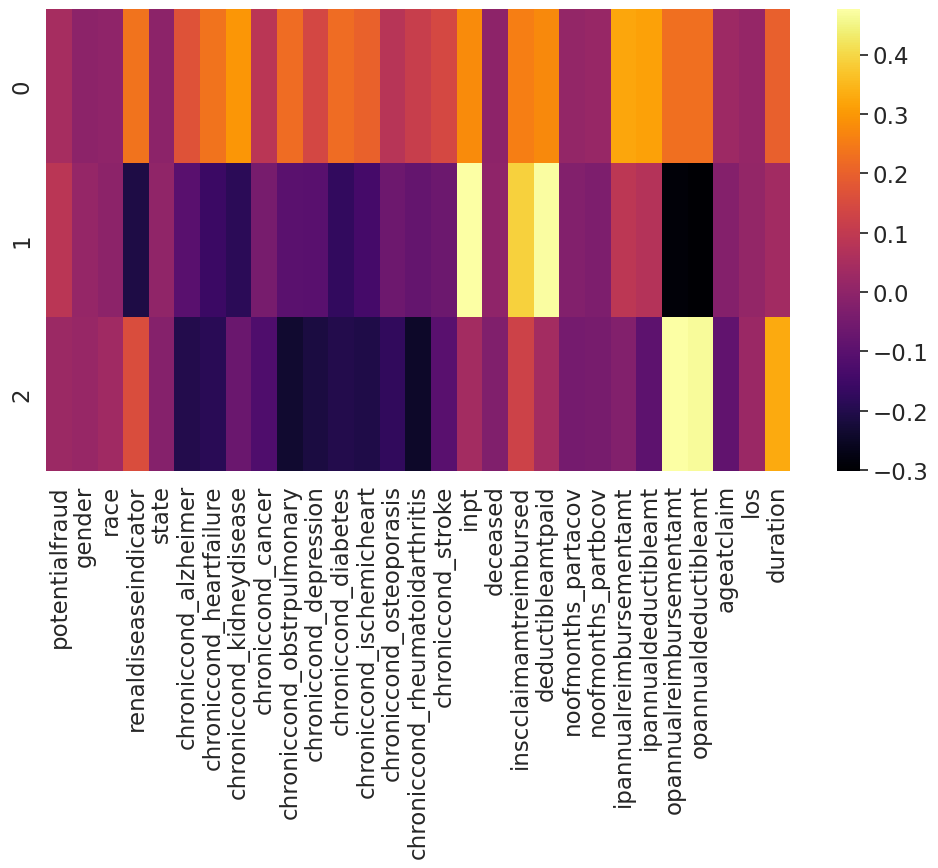

In [191]:
map= pd.DataFrame(pc3.components_,columns=data.columns)
plt.figure(figsize=(12,6))
sns.heatmap(map,cmap='inferno')